In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader.data as pdr

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

In [6]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock, 'yahoo', start, end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,187.141067,184.012293,185.505415,185.604032,3.058859e+07,184.477710
std,19.962231,19.633215,19.834044,19.812315,1.280913e+07,20.475461
min,157.080002,150.240005,154.830002,155.149994,1.251390e+07,153.388489
25%,173.089996,170.300003,172.000000,171.610001,2.161010e+07,169.898895
50%,179.440002,176.880005,177.960007,178.240005,2.735020e+07,176.815674
75%,192.880005,190.899994,191.899994,191.830002,3.574900e+07,191.159576
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,232.070007


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-10-17 to 2018-10-17
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


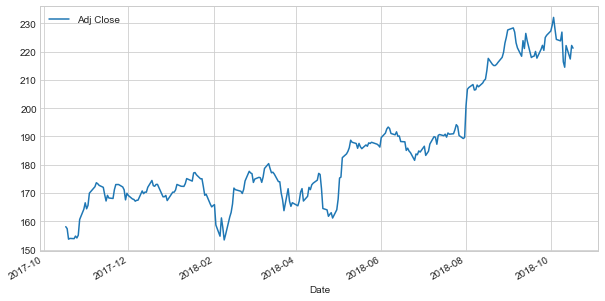

In [10]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,5))

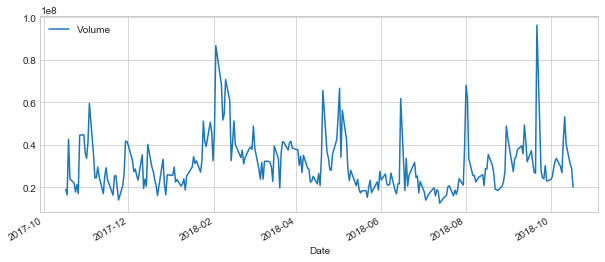

In [11]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

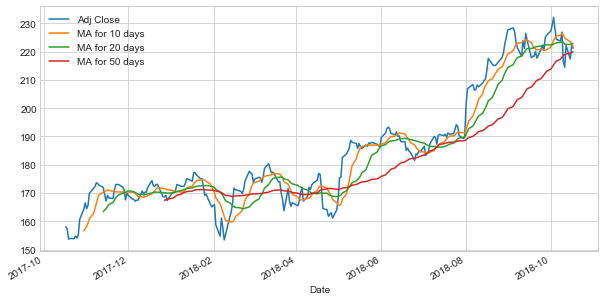

In [13]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,5))

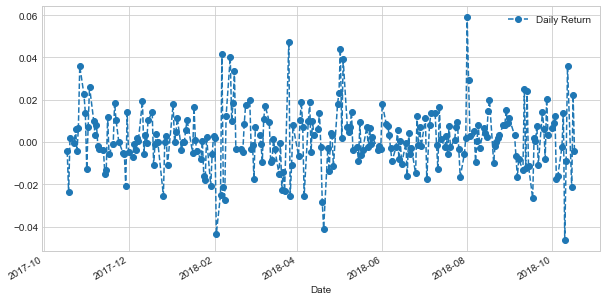

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,5), legend=True, linestyle='--', marker='o')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


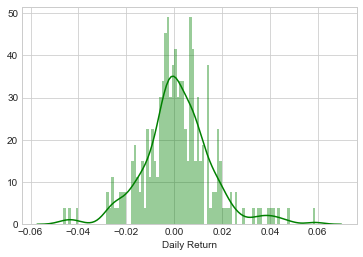

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='green')

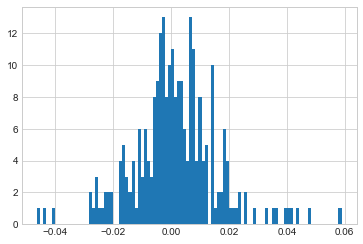

In [16]:
AAPL['Daily Return'].hist(bins=100,histtype='bar')

In [17]:
closing_df = pdr.DataReader(tech_list, 'yahoo',start, end)['Adj Close']

In [18]:
closing_df.head(10)

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2017-10-17,158.079819,1009.130005,992.179993,76.216393,355.750000
2017-10-18,157.380386,997.000000,992.809998,76.236046,359.649994
2017-10-19,153.656693,986.609985,984.450012,76.530739,351.809998
2017-10-20,153.922668,982.909973,988.200012,77.414795,345.100006
2017-10-23,153.843857,966.299988,968.450012,77.434448,337.019989
2017-10-24,154.760010,975.900024,970.539978,77.463921,337.339996
2017-10-25,154.080307,972.909973,973.330017,77.237976,325.839996
2017-10-26,155.065399,972.429993,972.559998,77.365685,326.170013
2017-10-27,160.621384,1100.949951,1019.270020,82.326286,320.869995


In [19]:
tech_returns = closing_df.pct_change()
tech_returns.head(10)

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2017-10-17,NaN,NaN,NaN,NaN,NaN
2017-10-18,-0.004425,-0.012020,0.000635,0.000258,0.010963
2017-10-19,-0.023660,-0.010421,-0.008421,0.003866,-0.021799
2017-10-20,0.001731,-0.003750,0.003809,0.011552,-0.019073
2017-10-23,-0.000512,-0.016899,-0.019986,0.000254,-0.023414
2017-10-24,0.005955,0.009935,0.002158,0.000381,0.000950
2017-10-25,-0.004392,-0.003064,0.002875,-0.002917,-0.034090
2017-10-26,0.006393,-0.000493,-0.000791,0.001653,0.001013
2017-10-27,0.035830,0.132164,0.048028,0.064119,-0.016249


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


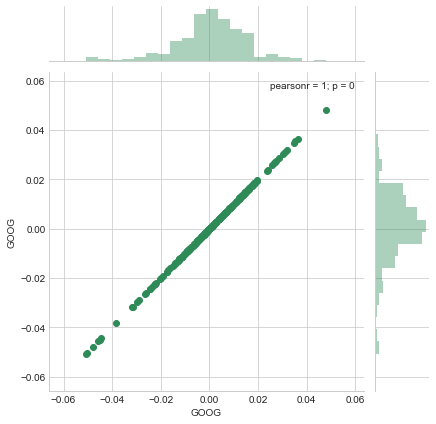

In [20]:
sns.jointplot('GOOG', 'GOOG', tech_returns, kind='scatter', color='seagreen')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


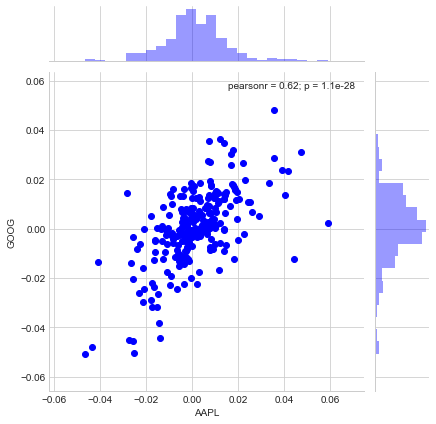

In [21]:
sns.jointplot('AAPL', 'GOOG', tech_returns, kind='scatter', color='blue')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


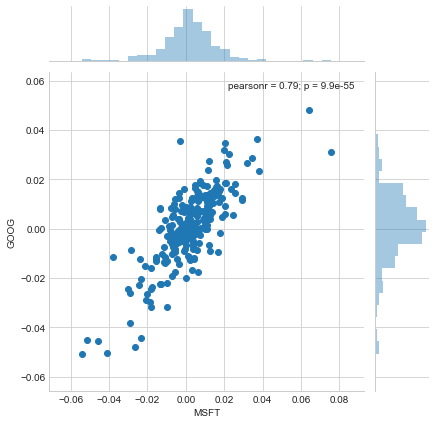

In [22]:
sns.jointplot('MSFT', 'GOOG', tech_returns, kind='scatter')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


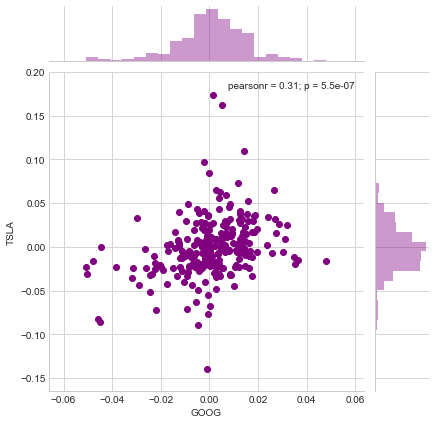

In [23]:
sns.jointplot('GOOG', 'TSLA', tech_returns, kind='scatter', color='purple')

In [24]:
tech_returns.head(10)

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2017-10-17,NaN,NaN,NaN,NaN,NaN
2017-10-18,-0.004425,-0.012020,0.000635,0.000258,0.010963
2017-10-19,-0.023660,-0.010421,-0.008421,0.003866,-0.021799
2017-10-20,0.001731,-0.003750,0.003809,0.011552,-0.019073
2017-10-23,-0.000512,-0.016899,-0.019986,0.000254,-0.023414
2017-10-24,0.005955,0.009935,0.002158,0.000381,0.000950
2017-10-25,-0.004392,-0.003064,0.002875,-0.002917,-0.034090
2017-10-26,0.006393,-0.000493,-0.000791,0.001653,0.001013
2017-10-27,0.035830,0.132164,0.048028,0.064119,-0.016249


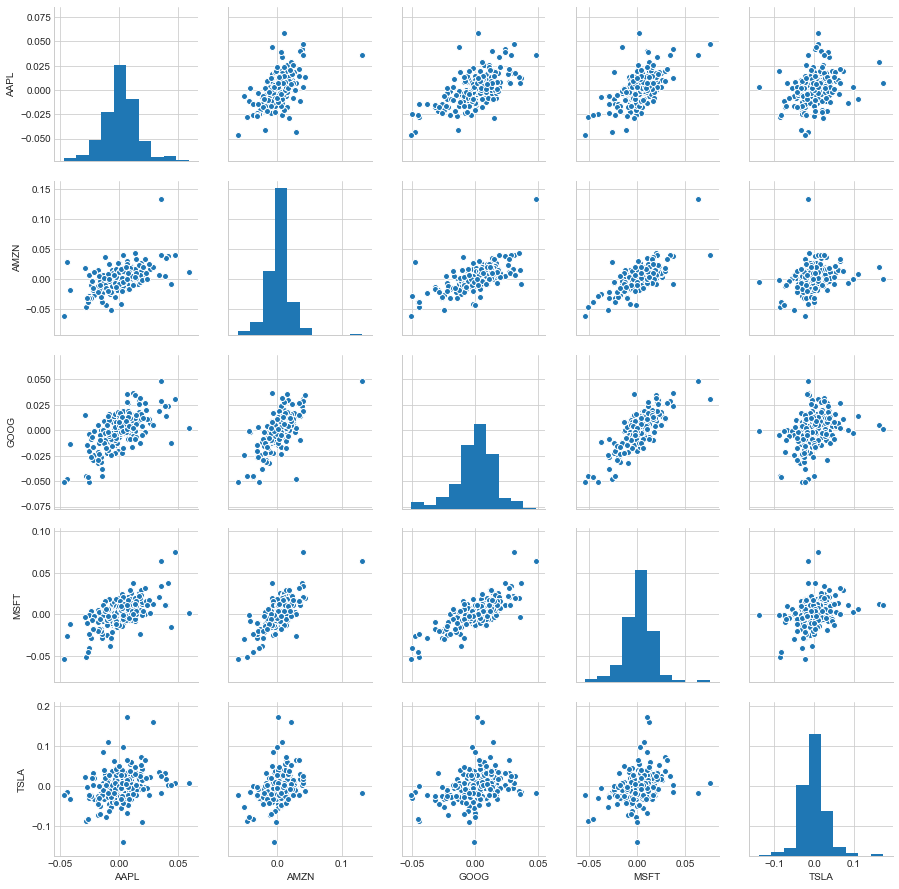

In [25]:
sns.pairplot(tech_returns.dropna())

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not use

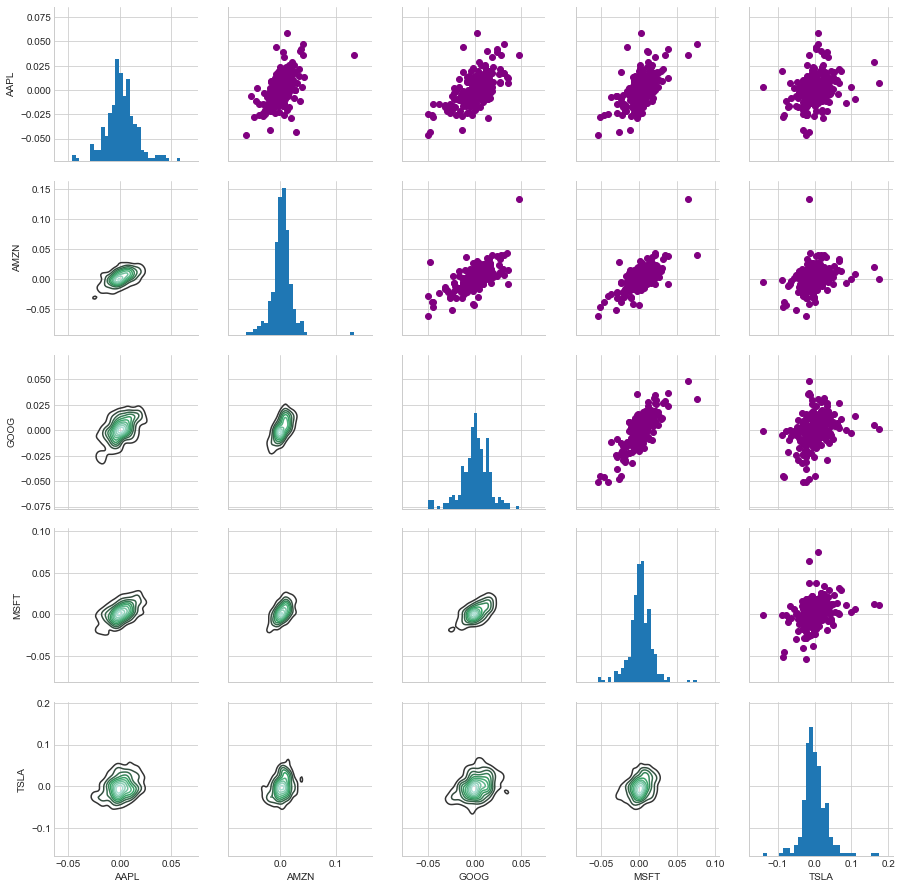

In [26]:
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, color='summer')
returns_fig.map_diag(plt.hist, bins=30)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not use

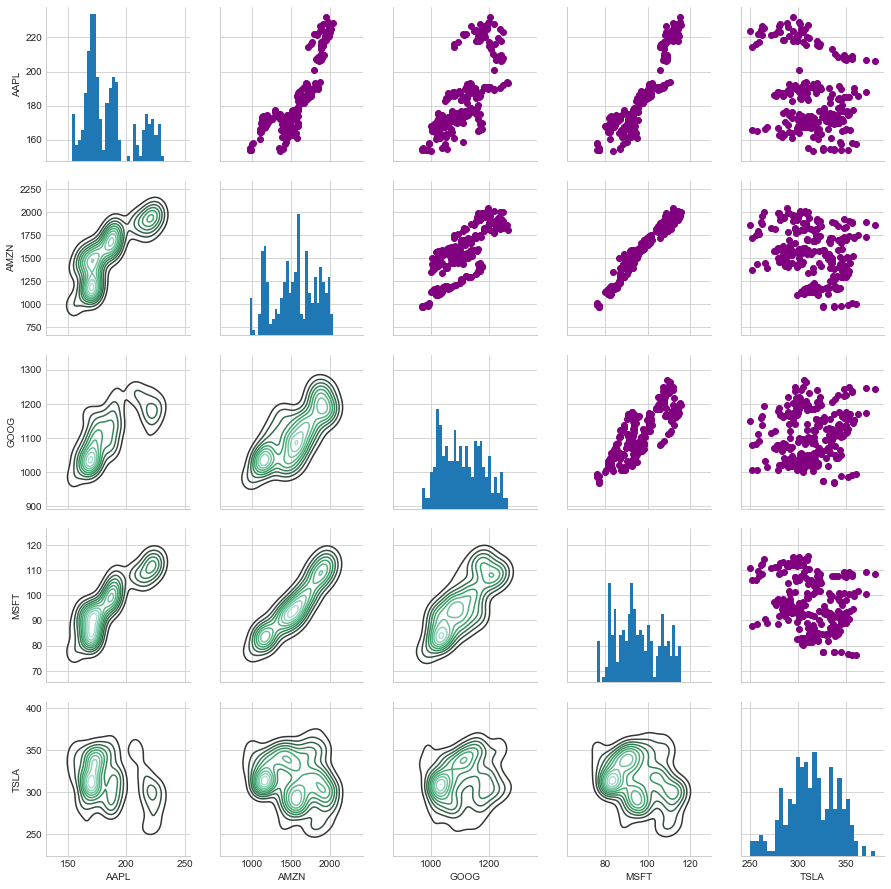

In [27]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, color='summer')
returns_fig.map_diag(plt.hist, bins=30)

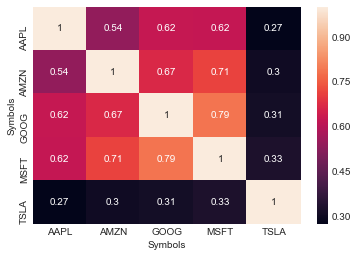

In [28]:
corr = tech_returns.corr().dropna()
sns.heatmap(corr, annot=True)


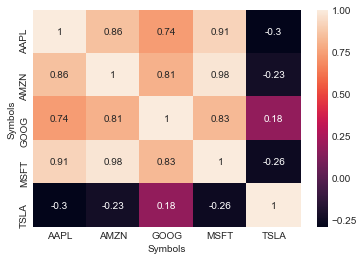

In [29]:
corr = closing_df.corr().dropna()
sns.heatmap(corr, annot=True)

In [30]:
rets = tech_returns.dropna()

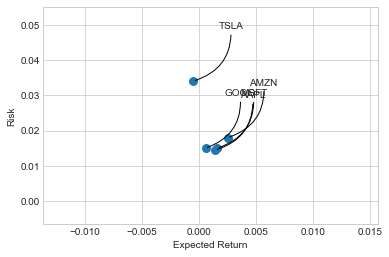

In [31]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.4'))

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


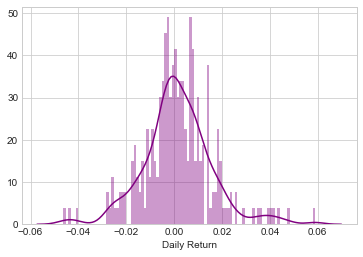

In [32]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')


In [33]:
rets['AAPL'].quantile(0.05)

-0.02196851700019954

In [34]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [35]:
def stock_monte_carlo(start_price, days, mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [36]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-17,996.440002,988.590027,990.289978,992.179993,1290200,992.179993
2017-10-18,996.719971,986.974976,991.770020,992.809998,1057600,992.809998
2017-10-19,988.880005,978.390015,986.000000,984.450012,1313600,984.450012
2017-10-20,991.000000,984.580017,989.440002,988.200012,1183200,988.200012
2017-10-23,989.520020,966.119995,989.520020,968.450012,1478400,968.450012


Text(0.5,1,'Monte Carlo Analysis for Google')

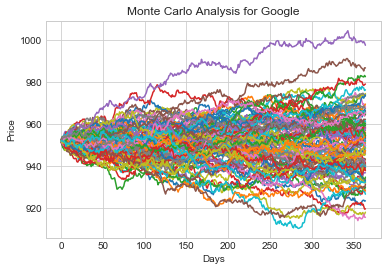

In [37]:
start_price = 952.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [38]:
runs = 10000

simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    


Text(0.5,1,'Final price distribution for Google Stock after 365 days')

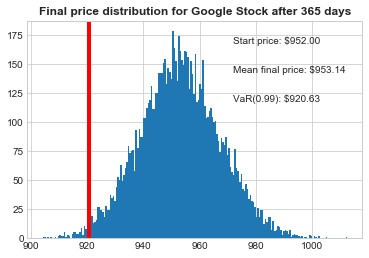

In [39]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" %q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distribution for Google Stock after %s days" %days, weight='bold')